<a href="https://colab.research.google.com/github/Kyssen/Mask-Detector/blob/main/LearnAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import random 
import cv2
import os
import glob
import matplotlib.pyplot as plt


In [ ]:
#Importing data set from Kaggle
os.environ['KAGGLE_USERNAME'] = 'yusufmoola211'
os.environ['KAGGLE_KEY'] = '00c7ae4c784f63a68821345cd24f9474'
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


 97% 322M/330M [00:04<00:00, 99.5MB/s]
100% 330M/330M [00:04<00:00, 80.3MB/s]


In [ ]:
#Unzipping file
! unzip face-mask-12k-images-dataset.zip

In [ ]:
#Directories for the three files: Test, Train and Validation
root_dir = '/content/Face Mask Dataset'
train_directory = os.path.join(root_dir, 'Train') 
val_directory = os.path.join(root_dir, 'Validation')
test_directory = os.path.join(root_dir, 'Test')

#Getting Mask and no mask folder within the train directory
train_with_mask = os.path.join(train_directory, 'WithMask')
train_without_mask = os.path.join(train_directory, 'WithoutMask')

#Getting Mask and no mask folder within the valid directory
val_with_mask = os.path.join(val_directory, 'WithMask')
val_without_mask = os.path.join(val_directory, 'WithoutMask')

#Getting Mask and no mask folder within the test directory

test_with_mask = os.path.join(test_directory, 'WithMask')
test_without_mask = os.path.join(test_directory, 'WithoutMask')


In [ ]:
# Number of images in the training dataset
print("-------------------------------")
print('Training dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(train_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(train_without_mask)))

# Number of images in the valid dataset
print("\n-------------------------------")
print('Valid dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(val_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(val_without_mask)))

# Number of images in the test dataset
print("\n-------------------------------")
print('Test dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(test_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(test_without_mask)))




-------------------------------
Training dataset image count:
-------------------------------
Number of Mask labeled images - 5000
Number of NonMask labeled images - 5000

-------------------------------
Valid dataset image count:
-------------------------------
Number of Mask labeled images - 400
Number of NonMask labeled images - 400

-------------------------------
Test dataset image count:
-------------------------------
Number of Mask labeled images - 483
Number of NonMask labeled images - 509


In [ ]:
#Training set with and without mask count
num_withmask_tr = len(os.listdir(train_with_mask))
num_withoutmask_tr = len(os.listdir(train_without_mask))

#Valid set with and without mask count
num_withmask_val = len(os.listdir(os.path.join(val_directory, 'WithMask')))
num_withoutmask_val = len(os.listdir(os.path.join(val_directory, 'WithoutMask')))

#Test set with and without mask count
num_withmask_test = len(os.listdir(os.path.join(test_directory, 'WithMask')))
num_withoutmask_test = len(os.listdir(os.path.join(test_directory, 'WithoutMask')))

#Totals
total_train = num_withmask_tr + num_withoutmask_tr
total_val = num_withmask_val + num_withoutmask_val
total_test = num_withmask_test + num_withoutmask_test


print("----------------------------------------")
print("                 TOTALS                 ")
print("----------------------------------------")
print("Number of images from Training set:", total_train)
print("Number of images from Validation set:", total_val)
print("Number of images from Validation set:", total_test)



----------------------------------------
                 TOTALS                 
----------------------------------------
Number of images from Training set: 10000
Number of images from Validation set: 800
Number of images from Validation set: 992


# **DATA** **VISUALIZATION**

In [ ]:
path = root_dir
os.listdir(path)

['Validation', 'Train', 'Test']

In [ ]:
image_path = []
mask_or_not = []
location = []

for folder in os.listdir(path):
    for label in os.listdir(path + "/" + folder):
        for image in glob.glob(path+ "/" + folder + "/" + label + "/" + "*.png"):
            image_path.append(image)
            mask_or_not.append(label)
            location.append(folder)
            
data = pd.DataFrame({'image_path':image_path,'label':mask_or_not,'location':location})
data.head()

image_path     label    location
0  /content/Face Mask Dataset/Validation/WithMask...  WithMask  Validation
1  /content/Face Mask Dataset/Validation/WithMask...  WithMask  Validation
2  /content/Face Mask Dataset/Validation/WithMask...  WithMask  Validation
3  /content/Face Mask Dataset/Validation/WithMask...  WithMask  Validation
4  /content/Face Mask Dataset/Validation/WithMask...  WithMask  Validation

In [ ]:
train_data =data[data['location']=='Train'].sample(frac=1)
test_data = data[data['location']=='Test'].sample(frac=1)
validation = data[data['location']=='Validation'].sample(frac=1) 

In [ ]:
def plot_images(data):
    for loc in range(5):
        plt.imshow(cv2.imread(data.iloc[loc,0]))
        plt.title(f'{data.iloc[loc,1]}-{data.iloc[loc,2]}')
        plt.show()

In [ ]:
plot_images(validation)
plot_images(train_data)
plot_images(test_data)

In [ ]:
sections = os.listdir(train_directory)
print("The classes in the train directory are:", sections)






The classes in the train directory are: ['WithMask', 'WithoutMask']


# **DATA PREPROCESSING**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# **Face Detection from image**

In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/UofT AI project google collab/'

Number of detected faces: 7


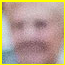

face0.jpg is saved


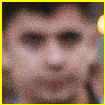

face1.jpg is saved


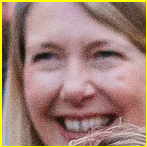

face2.jpg is saved


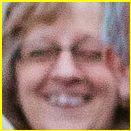

face3.jpg is saved


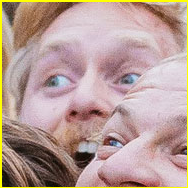

face4.jpg is saved


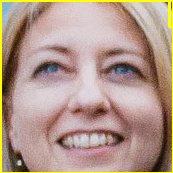

face5.jpg is saved


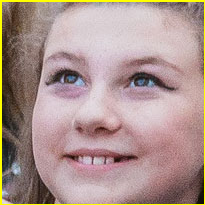

face6.jpg is saved


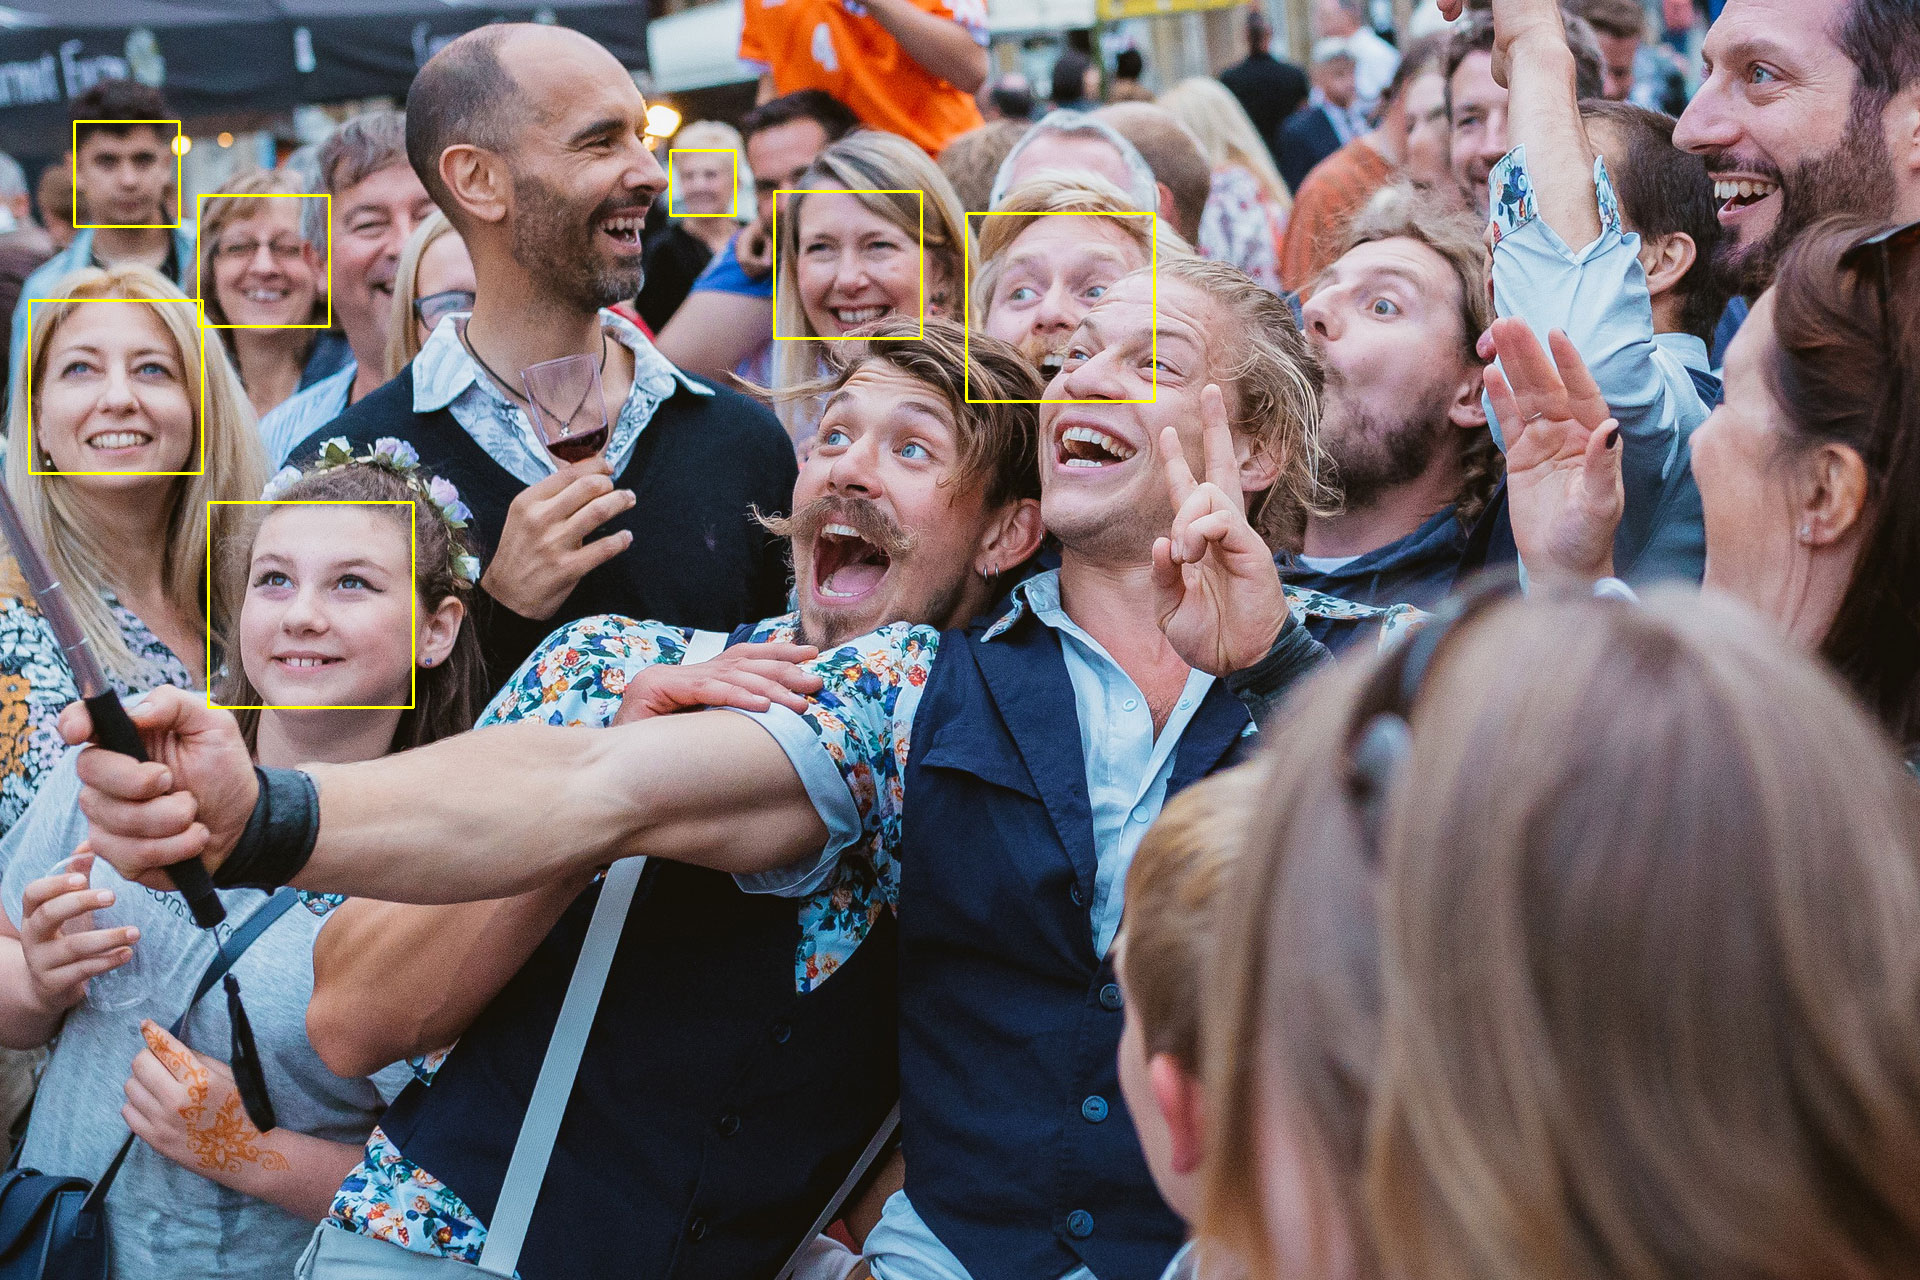

In [ ]:


# Read the input image
img = cv2.imread(base_dir + 'img/people.jpg')
  
# convert to grayscale of each frames
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# read the haarcascade to detect the faces in an image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# detects faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print('Number of detected faces:', len(faces))

# loop over all detected faces
if len(faces) > 0:
   for i, (x,y,w,h) in enumerate(faces):
      
      # To draw a rectangle in a face
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
      face = img[y:y+h, x:x+w]
      cv2_imshow(face)
      cv2.imwrite(f'face{i}.jpg', face)
      print(f"face{i}.jpg is saved")

# display the image with detected faces
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()